In [21]:
import CreatePIDsDF
import pandas
import random
import math
import matplotlib.pylab as plt

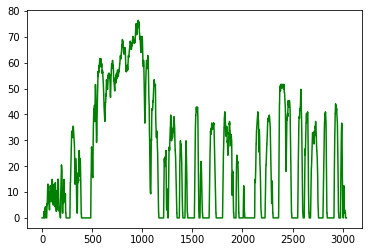

In [31]:
#ts1 = CreatePIDsDF.CreatePIDsDF('train.csv')['ts'][['Time (sec)', 'Vehicle speed (MPH)']]
ts1 = CreatePIDsDF.CreatePIDsDF('train.csv')['ts']['Vehicle speed (MPH)']
plt.plot(ts1, color = 'g')
plt.show()

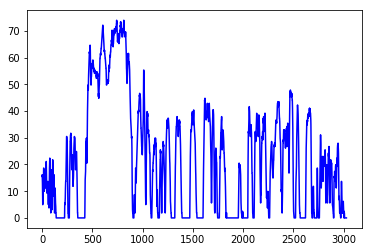

In [34]:
ts2 = CreatePIDsDF.CreatePIDsDF('test.csv')['ts']['Vehicle speed (MPH)']
plt.plot(ts2, color = 'b')
plt.show()

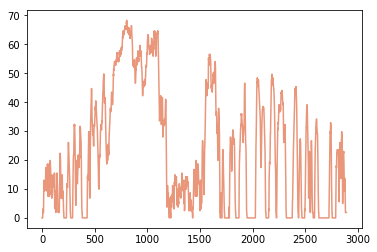

In [24]:
ts3 = CreatePIDsDF.CreatePIDsDF('CSVLog_20170913_164331.csv')['ts']['Vehicle speed (MPH)']
plt.plot(ts3, color = 'darksalmon')
plt.show()

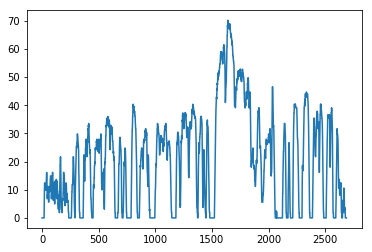

In [25]:
ts4 = CreatePIDsDF.CreatePIDsDF('CSVLog_20170911_171849.csv')['ts']['Vehicle speed (MPH)']
plt.plot(ts4)
plt.show()

In [26]:
df = pandas.concat([ts1, ts2, ts3], axis=1)
#df = pandas.DataFrame({'ts1': ts1, 'ts2': ts2, 'ts3': ts3, 'ts4': ts4})
df = df.as_matrix(columns=df.columns)

In [27]:
df

array([[  0.     ,  15.53428,   0.     ],
       [  0.     ,  15.53428,   0.     ],
       [  0.     ,  16.15565,   0.     ],
       ..., 
       [  0.     ,       nan,       nan],
       [  0.     ,       nan,       nan],
       [  0.     ,       nan,       nan]])

In [52]:
centroids=k_means_clust(df,3,10,10)

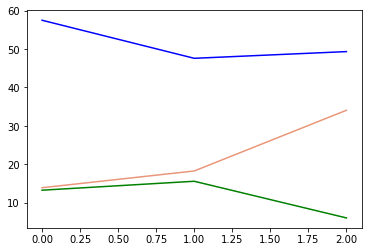

In [53]:
colors = ['g', 'b', 'darksalmon']
j = 0
for i in centroids:
    plt.plot(i, color = colors[j])
    j = j + 1

plt.show()

In [30]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return math.sqrt(LB_sum)

def DTWDistance(s1, s2,w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data),num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        #recalculate centroids of clusters
        for key in assignments:
            if key is None:
                continue
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]

    return centroids